## Bank Churn Analysis


The goal of this project is to train and test a model that will predict if a bank client is likely to leave. The bank's marketing department requires such a model so that they will be able to actively work on keeping clients who are considering leaving, rather than working on attracting new clients.

The data used for this project includes banking and financial information (bank services used, credit score, estimated salary, etc.) as well as basic personal information (age, gender, country of residence).

The metric used to draw conclusions about model performance was F1-score, although AUC-ROC was also looked at for comparative purposes.


### Содержание

[Импортирование библиотек и функций](#Импорты)

[Загрузка и просмотр данных](#Загрузка)

[Предотработка данных](#Предотработка)

[Разделение данных и тестирование моделей](#Тестирование)

[Финальное тестирование и общие выводы](#Финальное)

### Импортирование библиотек и функций
<a id='Импорты'></a>

In [139]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

### Загрузка и просмотр данных
<a id='Загрузка'></a>


In [100]:
try:
    churn = pd.read_csv('datasets/churn.csv')
except:
    churn = pd.read_csv('/datasets/Churn.csv')

churn.info()
display(churn.head(10).T)
display(churn.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,0,1,2,3,4,5,6,7,8,9
RowNumber,1,2,3,4,5,6,7,8,9,10
CustomerId,15634602,15647311,15619304,15701354,15737888,15574012,15592531,15656148,15792365,15592389
Surname,Hargrave,Hill,Onio,Boni,Mitchell,Chu,Bartlett,Obinna,He,H?
CreditScore,619,608,502,699,850,645,822,376,501,684
Geography,France,Spain,France,France,Spain,Spain,France,Germany,France,France
Gender,Female,Female,Female,Female,Female,Male,Male,Female,Male,Male
Age,42,41,42,39,43,44,50,29,44,27
Tenure,2.0,1.0,8.0,1.0,2.0,8.0,7.0,4.0,4.0,2.0
Balance,0.0,83807.86,159660.8,0.0,125510.82,113755.78,0.0,115046.74,142051.07,134603.88
NumOfProducts,1,1,3,2,1,2,2,4,2,1


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [101]:
print(f'Количество пропусков в столбце "Tenure" {len(churn[churn["Tenure"].isna()])}')

Количество пропусков в столбце "Tenure" 909


#### Загрузка и просмотр данных: выводы 

С помощью метода .info(), сразу стало ясно, что предоставленные данные хорошо обработаны с маленьким количеством пропусков.

Пропуски присутствуют только в столбце 'Tenure', а их всего 909 (из 10000). Не обнаружилась связь между значениями в столбце 'Tenure' и значениями в других столбцах (ни по простой логике, не с помощью метода .corr()). Из-за отсутствия логичной связи, я решил, что лучше всего заменить значения NaN на медиану.

Также, в таблице присутствует два столца с важными для анализа но не числовыми значениями – 'Geography' и 'Gender'. Нужно эти данные приобразить в используемой форме; для такой задачи пригодится функция pd.get_dummies()

Наконец, при просмотре данных стало ясно, что некоторые столбцы не требуются для нашего анализа. Столбцы 'Surname' и 'CustomerId' не нужны, их нужно устранять.

### Предотработка данных
<a id='Предотработка'></a>

*Создание дамми-признаки чтоды все данные были читаемые для моделей машинного обучения*

In [102]:
churn_ohe = pd.get_dummies(churn, columns=['Geography', 'Gender'], drop_first=True)

*Устранение ненужные данные, которые бы исказили результаты*

In [103]:
features = churn_ohe.drop(['Exited', 'Surname', 'CustomerId', 'RowNumber'], axis=1)
target = churn_ohe['Exited']

*Замена пропусков в столбце 'Tenure'*

In [104]:
features['Tenure'] = features['Tenure'].fillna(features['Tenure'].median())
display(features[features['Tenure'].isna() == True])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male


In [105]:
features.info()
display(features.head().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 654.4 KB


,0,1,2,3,4
CreditScore,619.00,608.00,502.00,699.00,850.00
Age,42.00,41.00,42.00,39.00,43.00
Tenure,2.00,1.00,8.00,1.00,2.00
Balance,0.00,83807.86,159660.80,0.00,125510.82
NumOfProducts,1.00,1.00,3.00,2.00,1.00
HasCrCard,1.00,0.00,1.00,0.00,1.00
IsActiveMember,1.00,1.00,0.00,0.00,1.00
EstimatedSalary,101348.88,112542.58,113931.57,93826.63,79084.10
Geography_Germany,0.00,0.00,0.00,0.00,0.00
Geography_Spain,0.00,1.00,0.00,0.00,1.00


Баланс классов: доля клиентов, которые ушли: 

Не ушёл    0.7963
Ушёл       0.2037
Name: Exited, dtype: float64


<AxesSubplot:title={'center':'Доля ушедших клиентов'}, ylabel=' '>

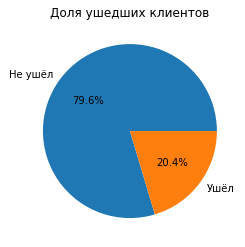

In [106]:
print("Баланс классов: доля клиентов, которые ушли: \n")
print(target.value_counts(normalize=True).rename({0:'Не ушёл', 1:'Ушёл'}))
display(target.value_counts(normalize=True).rename({0:'Не ушёл', 1:'Ушёл'}).plot(kind='pie', title='Доля ушедших клиентов', ylabel=' ', autopct='%1.1f%%'))

### Разделение данных и тестирование моделей
<a id='Тестирование'></a>

*Разделение данных на тренировочные и валидационные выборки*

In [107]:
features_train, features_valid_test, target_train, target_valid_test = (
    train_test_split(features, target, test_size=0.4, random_state=12345)
)

features_valid, features_test, target_valid, target_test = (
    train_test_split(features_valid_test, target_valid_test, test_size=0.5, random_state=12345)
)


In [108]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = pd.DataFrame(scaler.transform(features_train), columns=features_train.columns, index=features_train.index)
features_valid = pd.DataFrame(scaler.transform(features_valid), columns=features_valid.columns, index=features_valid.index)
features_test = pd.DataFrame(scaler.transform(features_test), columns=features_test.columns, index=features_test.index)

In [109]:
display(features_train.head(), features_valid.head(), features_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,0.642466,-1.055187,-0.187705,-0.572475,1.728977,0.907278
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,-1.556504,-1.055187,-0.333945,-0.572475,-0.578377,-1.102198
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,-1.556504,0.947699,1.503095,1.746802,-0.578377,0.907278
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,0.642466,-1.055187,-1.071061,-0.572475,-0.578377,0.907278
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,-1.556504,-1.055187,1.524268,1.746802,-0.578377,-1.102198


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-1.101690,-1.233163,0.830152,0.642466,-1.055187,-0.015173,-0.572475,-0.578377,-1.102198
5799,-0.284431,0.575842,-0.737696,-1.233163,-0.891560,0.642466,0.947699,1.471724,-0.572475,-0.578377,-1.102198
5511,0.151731,-0.657902,-1.829679,0.438711,-0.891560,0.642466,-1.055187,-1.367107,1.746802,-0.578377,0.907278
7365,-0.876366,-0.278288,1.810266,1.239884,-0.891560,0.642466,0.947699,-0.786517,-0.572475,1.728977,-1.102198
7367,-0.481743,0.291132,1.810266,-1.233163,0.830152,0.642466,-1.055187,1.358533,-0.572475,1.728977,0.907278


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-1.101690,-1.233163,0.830152,0.642466,-1.055187,0.647083,-0.572475,-0.578377,0.907278
5709,-0.087120,0.006422,1.446272,-1.233163,-0.891560,0.642466,-1.055187,-1.658410,-0.572475,-0.578377,-1.102198
7117,-0.917905,-0.752805,-0.009707,0.722307,-0.891560,0.642466,0.947699,-1.369334,-0.572475,1.728977,0.907278
7775,-0.253277,0.101325,1.810266,-1.233163,0.830152,0.642466,-1.055187,0.075086,-0.572475,1.728977,0.907278
8735,0.785204,-0.847708,1.810266,0.615625,-0.891560,-1.556504,0.947699,-1.070919,-0.572475,-0.578377,0.907278


*Тестирование моделей без учёта дисбаланса*

In [110]:
best_model = None
best_depth = 0
best_result = 0
best_f1 = 0
best_trees = 0
for trees in range(10, 80, 10):
    for depth in range(1,16):
        model = RandomForestClassifier(n_estimators=trees, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        pred = model.predict(features_valid)
        result = model.score(features_valid, target_valid)
        f1_result = f1_score(target_valid, pred)
        if f1_result > best_f1:
            best_model = model
            best_depth = depth
            best_result = result
            best_f1 = f1_result
            best_trees = trees
print(f'Лучшая модель без учёта дисбаланса: {best_model}')
print(f'Глубина лучшей модели: {best_depth}')
print(f'Количество деревев в лучшей модели: {best_trees}')
print(f'Точность лучшей модели: {best_result}')
print(f'F1-мера лучшей модели: {best_f1}')

Лучшая модель без учёта дисбаланса: RandomForestClassifier(max_depth=10, n_estimators=10, random_state=12345)
Глубина лучшей модели: 10
Количество деревев в лучшей модели: 10
Точность лучшей модели: 0.864
F1-мера лучшей модели: 0.5891238670694864


In [111]:
best_model.fit(features_train, target_train)
predictions_unbal = best_model.predict(features_valid)
print(f'F1-мера лучшей модели: {f1_score(target_valid, predictions_unbal)}')
print('Матрица ошибок:')
print(confusion_matrix(target_valid, predictions_unbal))


F1-мера лучшей модели: 0.5891238670694864
Матрица ошибок:
[[1533   49]
 [ 223  195]]


Небалансированние модели: краткие выводы

У лучшей модели без учёта дисбаланса были относительно высокие оценки точности и f1. В выборке наблюдается значительный дисбаланс классов: гораздо больше значений 0 (клиент не ушёл) чем количество значений 1 (клиент ушёл). Тем не менее, F1 мера около 0.57. Чем ближе f1 к 1, тем лучше модель предсказывает класс. 0.57 может казаться не отличным результатом, но поскольку не учтён здесь дисбаланс, мне он кажется неплохой – когда дисбаланс будет учтён, результат будет лучше.

*Тестирование моделей с учётом дисбаланса*

In [112]:
model_balanced = RandomForestClassifier(max_depth=10, n_estimators=10, class_weight='balanced', random_state=12345)
model_balanced.fit(features_train, target_train)
predictions_balanced = model_balanced.predict(features_valid)
probabilities_balanced = model_balanced.predict_proba(features_valid)
print("Модель с учётом дисбаланса (с такими же гипрепараметрами как у лучшей модели без учёта дисбаланса):")
print(f'F1-мера: {f1_score(target_valid, predictions_balanced)}')
print(f'roc-auc score: {roc_auc_score(target_valid, probabilities_balanced[:, 1])}')

Модель с учётом дисбаланса (с такими же гипрепараметрами как у лучшей модели без учёта дисбаланса):
F1-мера: 0.6038647342995168
roc-auc score: 0.8378377560957906


*Учёт дисбаланса с помощью параметра class_weight*

In [113]:
%%time
best_model_bal = None
best_depth_bal = 0
best_result_bal = 0
best_trees_bal =0
for trees in range(10, 80, 10):
    for depth in range(1,16):
        model = RandomForestClassifier(n_estimators=trees, max_depth=depth, class_weight='balanced', random_state=12345)
        model.fit(features_train, target_train)
        pred = model.predict(features_valid)
        result = f1_score(target_valid, pred)
        if result > best_result_bal:
            best_model_bal = model
            best_depth_bal = depth
            best_result_bal = result
            best_trees_bal = trees

print(f'Лучшая модель с учётом дисбаланса способом применеия параметра class_weight: {best_model_bal}')
print(f'Глубина лучшей модели: {best_depth_bal}')
print(f'Количество деревев в лучшей модели: {best_trees_bal}')
print(f'F1-мера лучшей модели: {best_result_bal}')

Лучшая модель с учётом дисбаланса способом применеия параметра class_weight: RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=60,
                       random_state=12345)
Глубина лучшей модели: 9
Количество деревев в лучшей модели: 60
F1-мера лучшей модели: 0.6292906178489703
CPU times: user 19.5 s, sys: 268 ms, total: 19.7 s
Wall time: 21.1 s


*Учёт дисбаланса с помощью upsampling*

In [114]:
def exit_upsample(features, target, repeat):
    
    features_exit = features[target == 1]
    features_no_exit = features[target == 0]
    target_exit = target[target == 1]
    target_no_exit = target[target == 0]
    
    features_upsampled = pd.concat([features_no_exit] + [features_exit]*repeat)
    target_upsampled = pd.concat([target_no_exit] + [target_exit]*repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [115]:
print(len(target_train[target_train==0])/len(target_train[target_train==1]),
      "раз больше клиентов, которые не ушли от банка, чем те, кто ушёл.")

4.016722408026756 раз больше клиентов, которые не ушли от банка, чем те, кто ушёл.


In [116]:
features_train_upsampled, target_train_upsampled = exit_upsample(features_train, target_train, 4)

In [126]:
%%time
best_model_upsampled = None
best_depth_upsampled = 0
best_result_upsampled = 0
best_trees_upsampled = 0
for trees in range(10, 80, 10):
    for depth in range(1,16):
        model = RandomForestClassifier(n_estimators=trees, max_depth=depth, random_state=12345)
        model.fit(features_train_upsampled, target_train_upsampled)
        pred = model.predict(features_valid)
        result = f1_score(target_valid, pred)
        if result > best_result_upsampled:
            best_model_upsampled = model
            best_depth_upsampled = depth
            best_result_upsampled = result
            best_trees_upsampled = trees

print(f'Лучшая модель с учётом дисбаланса способом upsampling-а: {best_model_upsampled}')
print(f'Глубина лучшей модели: {best_depth_upsampled}')
print(f'Количество деревев в лучшей модели: {best_trees_upsampled}')
print(f'F1-мера лучшей модели: {best_result_upsampled}')

Лучшая модель с учётом дисбаланса способом upsampling-а: RandomForestClassifier(max_depth=9, n_estimators=70, random_state=12345)
Глубина лучшей модели: 9
Количество деревев в лучшей модели: 70
F1-мера лучшей модели: 0.6291179596174282
CPU times: user 25.7 s, sys: 338 ms, total: 26 s
Wall time: 26.2 s


In [127]:
%%time
best_model_balanced_upsampled = None
best_depth_balanced_upsampled = 0
best_result_balanced_upsampled = 0
best_trees_balanced_upsampled = 0
for trees in range(10, 80, 10):
    for depth in range(1,16):
        model = RandomForestClassifier(n_estimators=trees, max_depth=depth, class_weight='balanced', random_state=12345)
        model.fit(features_train_upsampled, target_train_upsampled)
        pred = model.predict(features_valid)
        result = f1_score(target_valid, pred)
        if result > best_result_balanced_upsampled:
            best_model_balanced_upsampled = model
            best_depth_balanced_upsampled = depth
            best_result_balanced_upsampled = result
            best_trees_balanced_upsampled = trees

print(f'Лучшая модель с учётом дисбаланса с помощью и class_weight и upsampling: {best_model_balanced_upsampled}')
print(f'Глубина лучшей модели: {best_depth_balanced_upsampled}')
print(f'Количество деревев в лучшей модели: {best_trees_balanced_upsampled}')
print(f'F1-мера лучшей модели: {best_result_balanced_upsampled}')

Лучшая модель с учётом дисбаланса с помощью и class_weight и upsampling: RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=60,
                       random_state=12345)
Глубина лучшей модели: 13
Количество деревев в лучшей модели: 60
F1-мера лучшей модели: 0.6236559139784946
CPU times: user 25.2 s, sys: 298 ms, total: 25.5 s
Wall time: 25.6 s


In [124]:
%%time
best_tree_model_bal = None
best_tree_depth_bal = 0
best_tree_result_bal = 0

for depth in range(1,16):
    model = DecisionTreeClassifier(max_depth=depth, class_weight='balanced', random_state=12345)
    model.fit(features_train, target_train)
    pred = model.predict(features_valid)
    result = f1_score(target_valid, pred)
    if result > best_tree_result_bal:
        best_tree_model_bal = model
        best_tree_depth_bal = depth
        best_tree_result_bal = result
        

print(f'Лучшая модель DecisionTreeClassifier: {best_tree_model_bal}')
print(f'Глубина модели: {best_tree_depth_bal}')
print(f'F1-мера модели: {best_tree_result_bal}')

Лучшая модель DecisionTreeClassifier: DecisionTreeClassifier(max_depth=5, random_state=12345)
Глубина модели: 5
F1-мера модели: 0.5963791267305644
CPU times: user 370 ms, sys: 5.29 ms, total: 375 ms
Wall time: 384 ms


*Модели с учётом дисбаланса: выводы*

Я тестировал балансирирование модели три раза.

Сначала, я просто использовал те же гиперпараметры как у лучшей модели без учёта дисбаланса. Результаты улучшились: f1-мера стала 0.62.

Потом, я использовал цикл чтобы найти лучшую модель RandomForestClassifier (как раньше для модели без учёта дисбаланса). В этот раз гиперпараметры были другие; у лучшей модели глубина – 8, а количество деревев – 40. В итоге, f1-мера этой модели была 0.65. F1-мера 0.65 лучший результат из всех здесь тестированных моделей.

Наконец, я снова использовал цикл чтобы найти лучшую модель DecisionTreeClassifier. Вероятность, что в итоге она была бы лучшей модели RandomForestClassifier очень мала, но мне тоже было интересно узнать про разницу во времени обработки. Для обоих цикла, я использовал %%time чтобы увидеть эту разницу. Действительно, python гораздо быстрее обработал цикл с DecisionTreeClassifier (за 442 мс вместо 28.2 с), но f1-мера снизилзся до 0.60.

*Применение лучшей модели*

F1-score модели на тестовой выборке: 0.610738255033557
roc-auc score модели на тестовой выборке: 0.8532450069033132


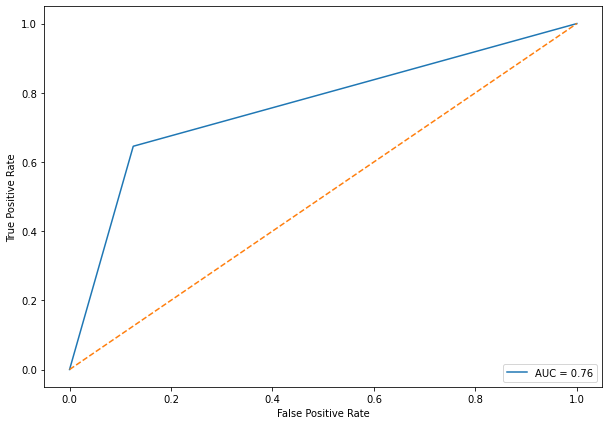

In [144]:
final_model = RandomForestClassifier(max_depth=9, n_estimators=60, class_weight='balanced', random_state=12345)
final_model.fit(features_train, target_train)
predictions_final = final_model.predict(features_test)
probabilities_final = final_model.predict_proba(features_test)

print('F1-score модели на тестовой выборке:', f1_score(target_test, predictions_final))
print('roc-auc score модели на тестовой выборке:', roc_auc_score(target_test, probabilities_final[:, 1]))

fpr, tpr, thresholds = roc_curve(target_test, predictions_final)
roc_auc = auc(fpr, tpr)
roc_plot = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
fig, ax = plt.subplots(figsize=(10,7))
roc_plot.plot(ax=ax)
ax.plot(np.linspace(0, 1),
         np.linspace(0, 1),
         linestyle='--')
plt.show()


### Финальное тестирование и общие выводы
<a id='Финальное'></a>

Лучшая модель:

RandomForestClassifier

Количество деревев: 40

Глубина: 8

В итоге, получилось поднять F1-меру до 0.65 (на валидационной), и AUC-ROC до 0.86. Как уже отмечено, чем ближе F1-мера к 1, тем эфективнее можно считать модель. AUC-ROC мера случайной модели равна 0.5; если мера выше 0.5, модель лучше предсказывает чем случайная модель, если мера равна 1, то модель предсказывает всё правильно. Поэтому, можно считать, что 0.86 довольно хороший результат.

Как я понимаю, AUC-ROC мера менее показательно при значительном дисбалансе классов. В нашей выборке действительно есть большой дисбаланс классов. Поэтому, чтобы оценить нашу модель, лучше доверяться F1-мера.

Главная цель этого исследования – предсказать возможный уход клиента банка. В итоге, нам интересен каждый отделельный клиент, не общая тенденция ухода клиентов. AUC-ROC относится ко всем данным вместе взятым (то есть, посчитается пользуясь площадью под кривой, построенной со всеми данными); F1 посчитается используя информацию каждого отдельного пункта (то есть, использует понятия истинно положительного, ложноположительного, истинно отрицательного, ложноотрицательного). Таким образом, для нашей задачи лучше использовать F1.
